### Compare MP models with PBL5 = 5 MYNN 2.5, Observed Data = Sacramento Water Treatment Plant.

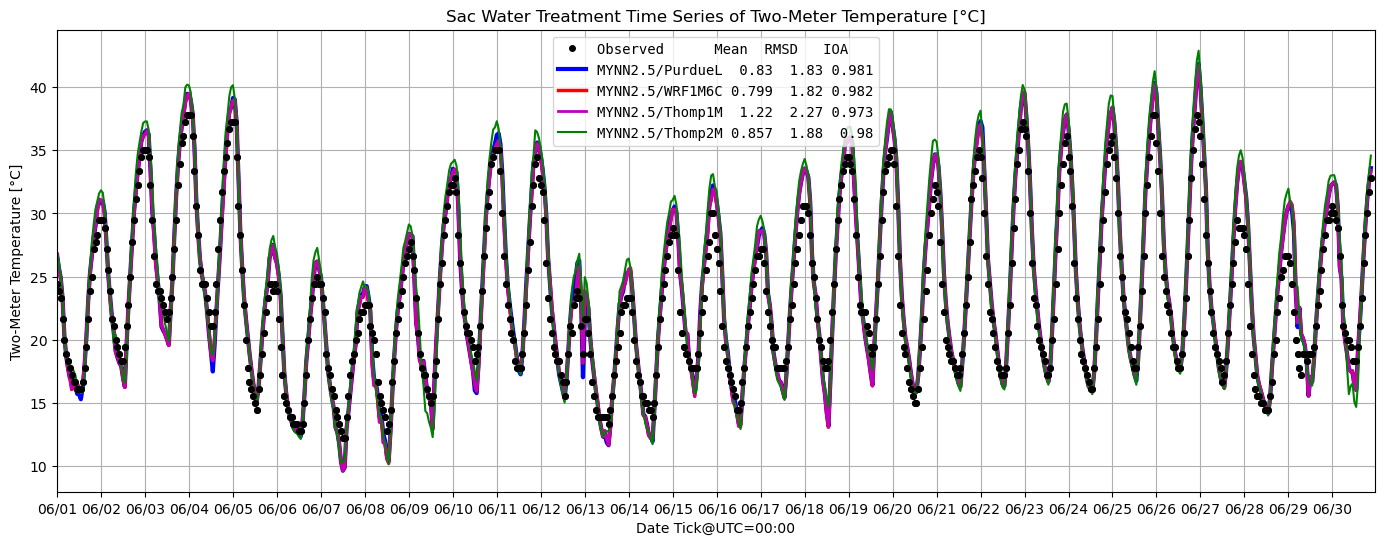

In [1]:
## Loading the Libaries.
from PyWRFFun import MonthGlob, CalcStats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager
import pandas as pd

# === Get monthly WRF Values ===
Var = "T2"
lat_point = 38.56844
lon_point = -121.49311
WRFFiles = ["/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_MP2_RAD4_250805/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_MP6_RAD4_251118/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_MP8_RAD4_250711/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_MP38_RAD4_250804/wrfout_d01_2020-06-*"
           ]
ModelDF  = MonthGlob(WRFFiles, Var, lat_point, lon_point, offset=-273.15)
ModelNames=["MYNN2.5/PurdueL","MYNN2.5/WRF1M6C","MYNN2.5/Thomp1M","MYNN2.5/Thomp2M"]
NModels=len(WRFFiles)

# ====== Get the EPA Data ======
DataDF = pd.read_csv(
    "/data/wto/EPAMetData/hourly_TEMP_2020_06_SacSoCap.csv",
    header=None, usecols=[11,12,13], names=["date", "time", "OBS"]
)

DataDF["datetime"] = pd.to_datetime(DataDF["date"] + " " + DataDF["time"])
DataDF = DataDF.set_index("datetime").sort_index()
DataDF["OBS"] = (DataDF["OBS"] - 32) * 5/9
FullDF = ModelDF.join(DataDF["OBS"], how="left")

# ====== Make the plot ======
Title = "Sac Capitol Time Series of Two-Meter Temperature [°C]"
YLabel = "Two-Meter Temperature [°C]"
labels = []
mean_bias, rmsd, ioa = CalcStats(FullDF)
for model_name, col in zip(ModelNames, mean_bias.index):
    labels.append(f"{model_name:<12}"  f"{mean_bias[col]:>6.3g}"
                  f"{rmsd[col]:>6.3g}" f"{ioa[col]:>6.3g}")
fig, ax = plt.subplots(figsize=(17,6))
ax.plot(FullDF.index, FullDF["OBS"], 'k.', markersize=8, label=f"{'Observed':<12}" f"{'Mean':>6}" f"{'RMSD':>6}" f"{'IOA':>6}")
ax.plot(FullDF.index, FullDF["Model1"], 'b-', linewidth=3, label=labels[0])
ax.plot(FullDF.index, FullDF["Model2"], 'r-', linewidth=2.5, label=labels[1])
ax.plot(FullDF.index, FullDF["Model2"], 'm-', linewidth=2, label=labels[2])
ax.plot(FullDF.index, FullDF["Model3"], 'g-', linewidth=1.5, label=labels[3])
ax.plot(FullDF.index, FullDF["OBS"], 'k.', markersize=8)
ax.set_xlim([DataDF.index.min(), DataDF.index.max()])
plt.xlabel("Date Tick@UTC=00:00")
plt.ylabel(YLabel)
plt.title(Title)
plt.grid(True)
plt.legend(prop=font_manager.FontProperties(family='monospace'))
# --- force daily ticks ---
ax.xaxis.set_major_locator(mdates.DayLocator())              # tick every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))  # format tick labels
plt.show()


### Compare MP models with PBL5 = 1 Yonsei University, Observed Data = Sacramento Water Treatment Plant.

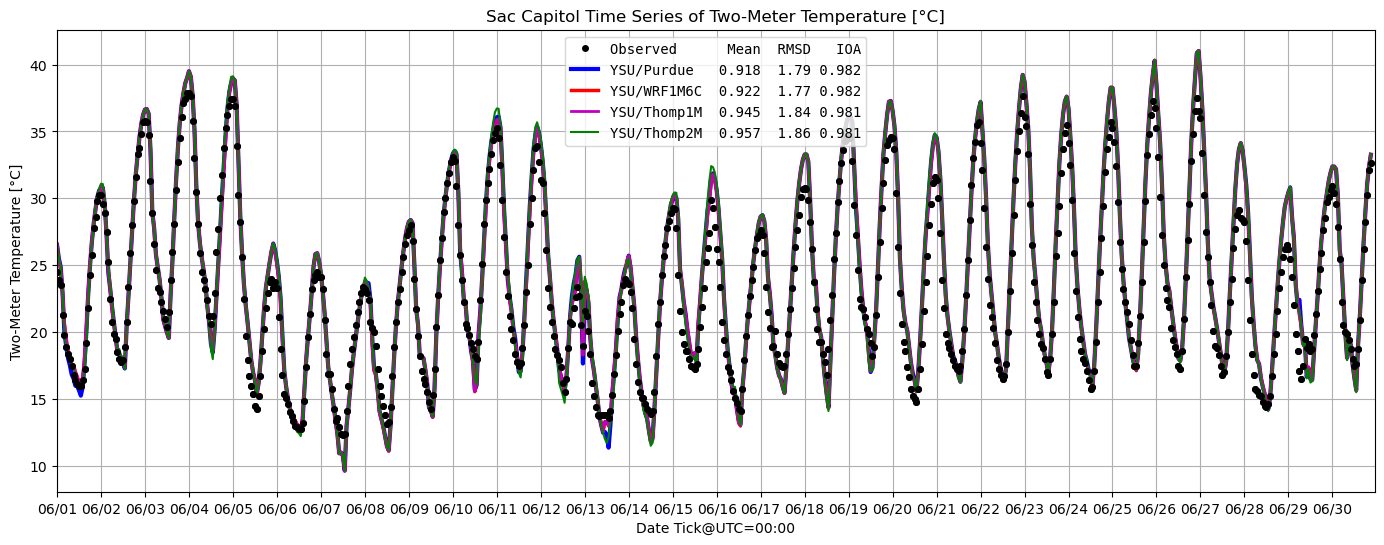

In [9]:
## Loading the Libaries.
from PyWRFFun import MonthGlob, CalcStats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager
import pandas as pd

# === Get monthly WRF Values ===
Var = "T2"
lat_point = 38.56844
lon_point = -121.49311
WRFFiles = ["/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP2_RAD4_250716/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP6_RAD4_250718/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP8_RAD4_250714/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP38_RAD4_250719/wrfout_d01_2020-06-*"
           ]
ModelDF  = MonthGlob(WRFFiles, Var, lat_point, lon_point, offset=-273.15)
ModelNames=["YSU/Purdue","YSU/WRF1M6C","YSU/Thomp1M","YSU/Thomp2M"]
NModels=len(WRFFiles)

# ====== Get the EPA Data ======
DataDF = pd.read_csv(
    "/data/wto/EPAMetData/hourly_TEMP_2020_06_SacSoCap.csv",
    header=None, usecols=[11,12,13], names=["date", "time", "OBS"]
)

DataDF["datetime"] = pd.to_datetime(DataDF["date"] + " " + DataDF["time"])
DataDF = DataDF.set_index("datetime").sort_index()
DataDF["OBS"] = (DataDF["OBS"] - 32) * 5/9
FullDF = ModelDF.join(DataDF["OBS"], how="left")

# ====== Make the plot ======
Title = "Sac Capitol Time Series of Two-Meter Temperature [°C]"
YLabel = "Two-Meter Temperature [°C]"
labels = []
mean_bias, rmsd, ioa = CalcStats(FullDF)
for model_name, col in zip(ModelNames, mean_bias.index):
    labels.append(f"{model_name:<12}"  f"{mean_bias[col]:>6.3g}"
                  f"{rmsd[col]:>6.3g}" f"{ioa[col]:>6.3g}")
fig, ax = plt.subplots(figsize=(17,6))
ax.plot(FullDF.index, FullDF["OBS"], 'k.', markersize=8, label=f"{'Observed':<12}" f"{'Mean':>6}" f"{'RMSD':>6}" f"{'IOA':>6}")
ax.plot(FullDF.index, FullDF["Model1"], 'b-', linewidth=3, label=labels[0])
ax.plot(FullDF.index, FullDF["Model2"], 'r-', linewidth=2.5, label=labels[1])
ax.plot(FullDF.index, FullDF["Model2"], 'm-', linewidth=2, label=labels[2])
ax.plot(FullDF.index, FullDF["Model3"], 'g-', linewidth=1.5, label=labels[3])
ax.plot(FullDF.index, FullDF["OBS"], 'k.', markersize=8)
ax.set_xlim([DataDF.index.min(), DataDF.index.max()])
plt.xlabel("Date Tick@UTC=00:00")
plt.ylabel(YLabel)
plt.title(Title)
plt.grid(True)
plt.legend(prop=font_manager.FontProperties(family='monospace'))
# --- force daily ticks ---
ax.xaxis.set_major_locator(mdates.DayLocator())              # tick every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))  # format tick labels
plt.show()

### Compare MP models with PBL5 = 1 Yonsei University, Observed Data = Stockton

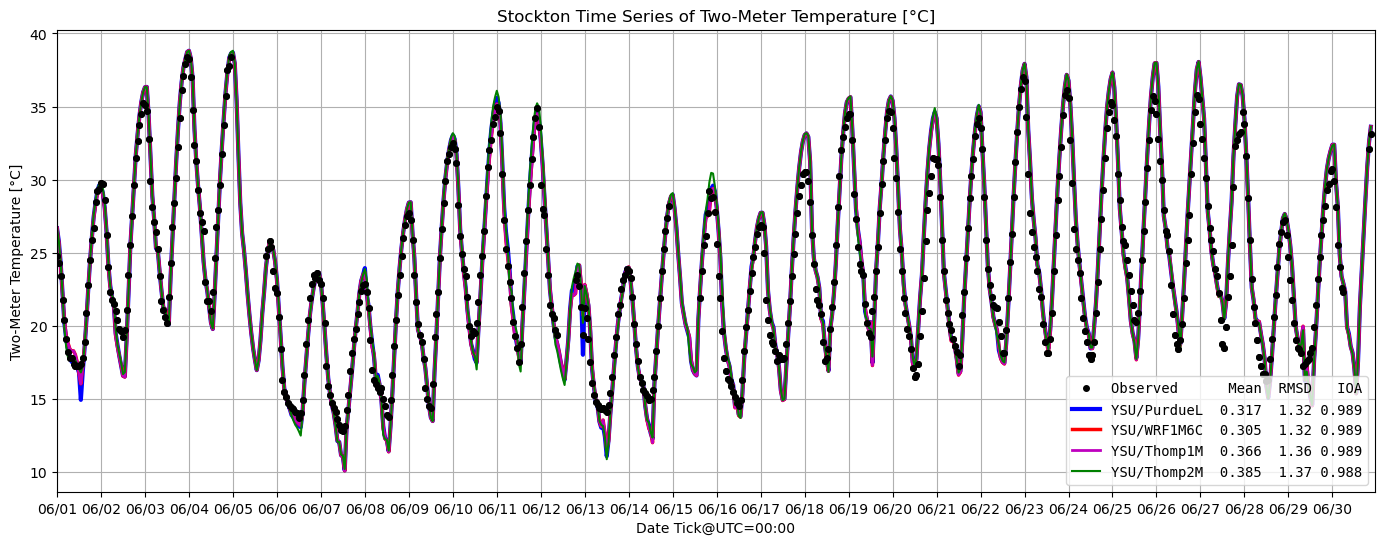

In [3]:
## Loading the Libaries.
from PyWRFFun import MonthGlob, CalcStats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager
import pandas as pd

# === Get monthly WRF Values ===
Var = "T2"
lat_point = 37.950741
lon_point = -121.268523
WRFFiles = ["/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP2_RAD4_250716/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP6_RAD4_250718/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP8_RAD4_250714/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP38_RAD4_250719/wrfout_d01_2020-06-*"
           ]
ModelDF  = MonthGlob(WRFFiles, Var, lat_point, lon_point, offset=-273.15)
ModelNames=["YSU/PurdueL","YSU/WRF1M6C","YSU/Thomp1M","YSU/Thomp2M"]
NModels=len(WRFFiles)

# ====== Get the EPA Data ======
DataDF = pd.read_csv(
    "/data/wto/EPAMetData/hourly_TEMP_2020_06_Stockton.csv",
    header=None, usecols=[11,12,13], names=["date", "time", "OBS"]
)

DataDF["datetime"] = pd.to_datetime(DataDF["date"] + " " + DataDF["time"])
DataDF = DataDF.set_index("datetime").sort_index()
DataDF["OBS"] = (DataDF["OBS"] - 32) * 5/9
FullDF = ModelDF.join(DataDF["OBS"], how="left")

# ====== Make the plot ======
Title = "Stockton Time Series of Two-Meter Temperature [°C]"
YLabel = "Two-Meter Temperature [°C]"
labels = []
mean_bias, rmsd, ioa = CalcStats(FullDF)
for model_name, col in zip(ModelNames, mean_bias.index):
    labels.append(f"{model_name:<12}"  f"{mean_bias[col]:>6.3g}"
                  f"{rmsd[col]:>6.3g}" f"{ioa[col]:>6.3g}")
fig, ax = plt.subplots(figsize=(17,6))
ax.plot(FullDF.index, FullDF["OBS"], 'k.', markersize=8, label=f"{'Observed':<12}" f"{'Mean':>6}" f"{'RMSD':>6}" f"{'IOA':>6}")
ax.plot(FullDF.index, FullDF["Model1"], 'b-', linewidth=3, label=labels[0])
ax.plot(FullDF.index, FullDF["Model2"], 'r-', linewidth=2.5, label=labels[1])
ax.plot(FullDF.index, FullDF["Model2"], 'm-', linewidth=2, label=labels[2])
ax.plot(FullDF.index, FullDF["Model3"], 'g-', linewidth=1.5, label=labels[3])
ax.plot(FullDF.index, FullDF["OBS"], 'k.', markersize=8)
ax.set_xlim([DataDF.index.min(), DataDF.index.max()])
plt.xlabel("Date Tick@UTC=00:00")
plt.ylabel(YLabel)
plt.title(Title)
plt.grid(True)
plt.legend(prop=font_manager.FontProperties(family='monospace'))
# --- force daily ticks ---
ax.xaxis.set_major_locator(mdates.DayLocator())              # tick every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))  # format tick labels
plt.show()

### Compare MP models with PBL5 = 5 MYNN 2.5, Observed Data = Stockton

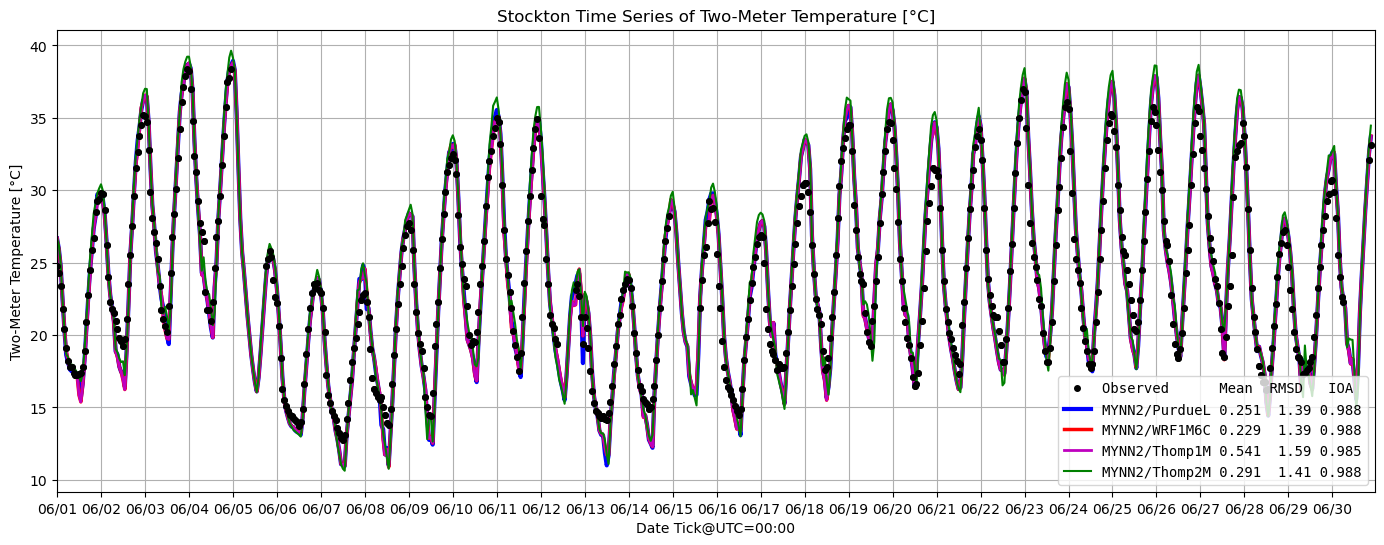

In [4]:
## Loading the Libaries.
from PyWRFFun import MonthGlob, CalcStats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager
import pandas as pd

# === Get monthly WRF Values ===
Var = "T2"
lat_point = 37.950741
lon_point = -121.268523
WRFFiles = ["/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_MP2_RAD4_250805/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_MP6_RAD4_251118/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_MP8_RAD4_250711/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_MP38_RAD4_250804/wrfout_d01_2020-06-*"
           ]
ModelDF  = MonthGlob(WRFFiles, Var, lat_point, lon_point, offset=-273.15)
ModelNames=["MYNN2/PurdueL","MYNN2/WRF1M6C","MYNN2/Thomp1M","MYNN2/Thomp2M"]
NModels=len(WRFFiles)

# ====== Get the EPA Data ======
DataDF = pd.read_csv(
    "/data/wto/EPAMetData/hourly_TEMP_2020_06_Stockton.csv",
    header=None, usecols=[11,12,13], names=["date", "time", "OBS"]
)

DataDF["datetime"] = pd.to_datetime(DataDF["date"] + " " + DataDF["time"])
DataDF = DataDF.set_index("datetime").sort_index()
DataDF["OBS"] = (DataDF["OBS"] - 32) * 5/9
FullDF = ModelDF.join(DataDF["OBS"], how="left")

# ====== Make the plot ======
Title = "Stockton Time Series of Two-Meter Temperature [°C]"
YLabel = "Two-Meter Temperature [°C]"
labels = []
mean_bias, rmsd, ioa = CalcStats(FullDF)
for model_name, col in zip(ModelNames, mean_bias.index):
    labels.append(f"{model_name:<12}"  f"{mean_bias[col]:>6.3g}"
                  f"{rmsd[col]:>6.3g}" f"{ioa[col]:>6.3g}")
fig, ax = plt.subplots(figsize=(17,6))
ax.plot(FullDF.index, FullDF["OBS"], 'k.', markersize=8, label=f"{'Observed':<12}" f"{'Mean':>6}" f"{'RMSD':>6}" f"{'IOA':>6}")
ax.plot(FullDF.index, FullDF["Model1"], 'b-', linewidth=3, label=labels[0])
ax.plot(FullDF.index, FullDF["Model2"], 'r-', linewidth=2.5, label=labels[1])
ax.plot(FullDF.index, FullDF["Model2"], 'm-', linewidth=2, label=labels[2])
ax.plot(FullDF.index, FullDF["Model3"], 'g-', linewidth=1.5, label=labels[3])
ax.plot(FullDF.index, FullDF["OBS"], 'k.', markersize=8)
ax.set_xlim([DataDF.index.min(), DataDF.index.max()])
plt.xlabel("Date Tick@UTC=00:00")
plt.ylabel(YLabel)
plt.title(Title)
plt.grid(True)
plt.legend(prop=font_manager.FontProperties(family='monospace'))
# --- force daily ticks ---
ax.xaxis.set_major_locator(mdates.DayLocator())              # tick every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))  # format tick labels
plt.show()

### RH2 Compare MP models with PBL5 = 5 MYNN 2.5, Observed Data = Stockton

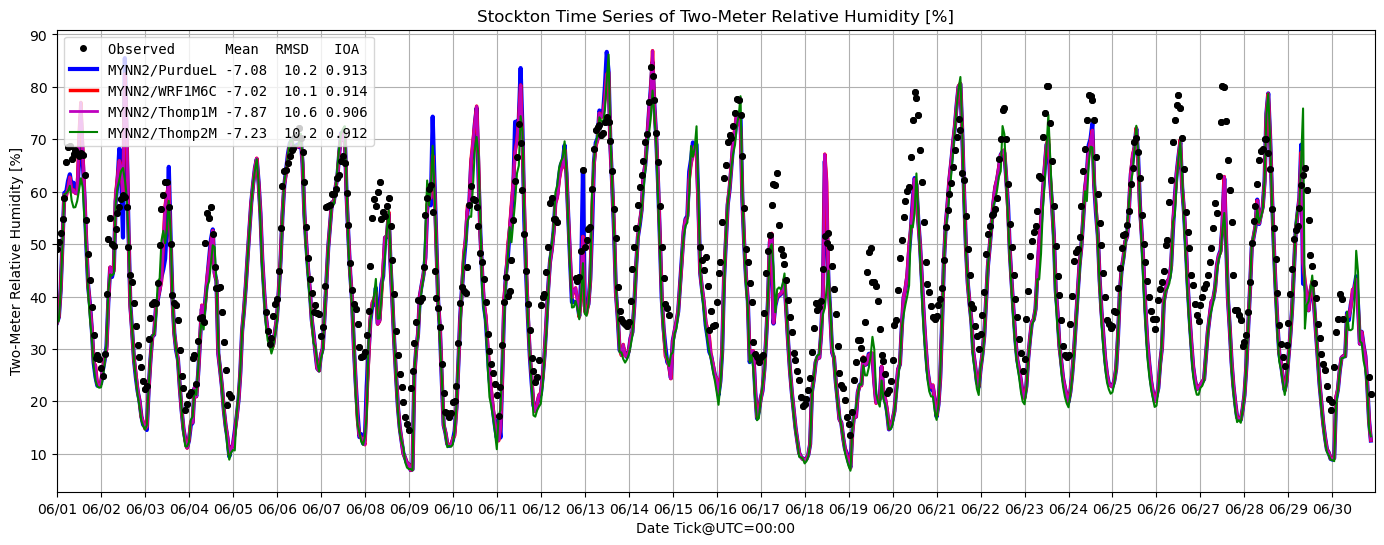

In [5]:
## Loading the Libaries.
from PyWRFFun import MonthGlob, CalcStats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager
import pandas as pd

# === Get monthly WRF Values ===
Var = "rh2"
lat_point = 37.950741
lon_point = -121.268523
WRFFiles = ["/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_MP2_RAD4_250805/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_MP6_RAD4_251118/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_MP8_RAD4_250711/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_MP38_RAD4_250804/wrfout_d01_2020-06-*"
           ]
ModelDF  = MonthGlob(WRFFiles, Var, lat_point, lon_point)
ModelNames=["MYNN2/PurdueL","MYNN2/WRF1M6C","MYNN2/Thomp1M","MYNN2/Thomp2M"]
NModels=len(WRFFiles)

# ====== Get the EPA Data ======
DataDF = pd.read_csv(
    "/data/wto/EPAMetData/hourly_RH_2020_06_Stockton.csv",
    header=None, usecols=[11,12,13], names=["date", "time", "OBS"]
)

DataDF["datetime"] = pd.to_datetime(DataDF["date"] + " " + DataDF["time"])
DataDF = DataDF.set_index("datetime").sort_index()
FullDF = ModelDF.join(DataDF["OBS"], how="left")

# ====== Make the plot ======
Title = "Stockton Time Series of Two-Meter Relative Humidity [%]"
YLabel = "Two-Meter Relative Humidity [%]"
labels = []
mean_bias, rmsd, ioa = CalcStats(FullDF)
for model_name, col in zip(ModelNames, mean_bias.index):
    labels.append(f"{model_name:<12}"  f"{mean_bias[col]:>6.3g}"
                  f"{rmsd[col]:>6.3g}" f"{ioa[col]:>6.3g}")
fig, ax = plt.subplots(figsize=(17,6))
ax.plot(FullDF.index, FullDF["OBS"], 'k.', markersize=8, label=f"{'Observed':<12}" f"{'Mean':>6}" f"{'RMSD':>6}" f"{'IOA':>6}")
ax.plot(FullDF.index, FullDF["Model1"], 'b-', linewidth=3, label=labels[0])
ax.plot(FullDF.index, FullDF["Model2"], 'r-', linewidth=2.5, label=labels[1])
ax.plot(FullDF.index, FullDF["Model2"], 'm-', linewidth=2, label=labels[2])
ax.plot(FullDF.index, FullDF["Model3"], 'g-', linewidth=1.5, label=labels[3])
ax.plot(FullDF.index, FullDF["OBS"], 'k.', markersize=8)
ax.set_xlim([DataDF.index.min(), DataDF.index.max()])
plt.xlabel("Date Tick@UTC=00:00")
plt.ylabel(YLabel)
plt.title(Title)
plt.grid(True)
plt.legend(prop=font_manager.FontProperties(family='monospace'))
# --- force daily ticks ---
ax.xaxis.set_major_locator(mdates.DayLocator())              # tick every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))  # format tick labels
plt.show()

### RH2 Compare MP models with PBL = 1 YSU, Observed Data = Stockton

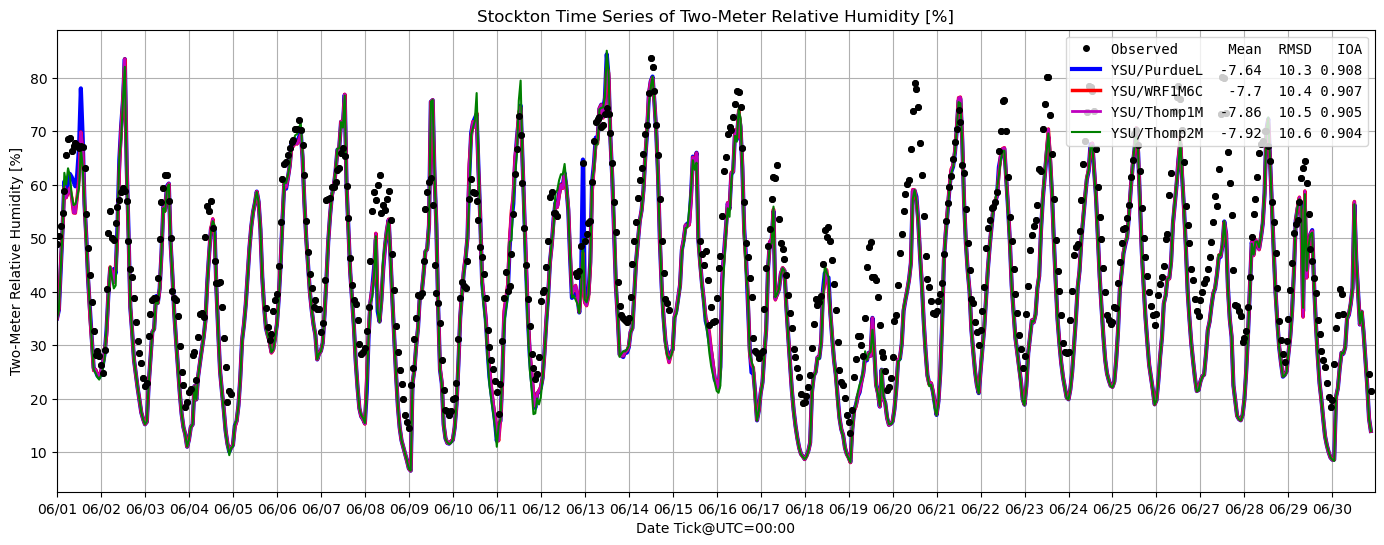

In [6]:
## Loading the Libaries.
from PyWRFFun import MonthGlob, CalcStats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager
import pandas as pd

# === Get monthly WRF Values ===
Var = "rh2"
lat_point = 37.950741
lon_point = -121.268523
WRFFiles = ["/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP2_RAD4_250716/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP6_RAD4_250718/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP8_RAD4_250714/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP38_RAD4_250719/wrfout_d01_2020-06-*"
           ]
ModelDF  = MonthGlob(WRFFiles, Var, lat_point, lon_point)
ModelNames=["YSU/PurdueL","YSU/WRF1M6C","YSU/Thomp1M","YSU/Thomp2M"]
NModels=len(WRFFiles)

# ====== Get the EPA Data ======
DataDF = pd.read_csv(
    "/data/wto/EPAMetData/hourly_RH_2020_06_Stockton.csv",
    header=None, usecols=[11,12,13], names=["date", "time", "OBS"]
)

DataDF["datetime"] = pd.to_datetime(DataDF["date"] + " " + DataDF["time"])
DataDF = DataDF.set_index("datetime").sort_index()
FullDF = ModelDF.join(DataDF["OBS"], how="left")

# ====== Make the plot ======
Title = "Stockton Time Series of Two-Meter Relative Humidity [%]"
YLabel = "Two-Meter Relative Humidity [%]"
labels = []
mean_bias, rmsd, ioa = CalcStats(FullDF)
for model_name, col in zip(ModelNames, mean_bias.index):
    labels.append(f"{model_name:<12}"  f"{mean_bias[col]:>6.3g}"
                  f"{rmsd[col]:>6.3g}" f"{ioa[col]:>6.3g}")
fig, ax = plt.subplots(figsize=(17,6))
ax.plot(FullDF.index, FullDF["OBS"], 'k.', markersize=8, label=f"{'Observed':<12}" f"{'Mean':>6}" f"{'RMSD':>6}" f"{'IOA':>6}")
ax.plot(FullDF.index, FullDF["Model1"], 'b-', linewidth=3, label=labels[0])
ax.plot(FullDF.index, FullDF["Model2"], 'r-', linewidth=2.5, label=labels[1])
ax.plot(FullDF.index, FullDF["Model2"], 'm-', linewidth=2, label=labels[2])
ax.plot(FullDF.index, FullDF["Model3"], 'g-', linewidth=1.5, label=labels[3])
ax.plot(FullDF.index, FullDF["OBS"], 'k.', markersize=8)
ax.set_xlim([DataDF.index.min(), DataDF.index.max()])
plt.xlabel("Date Tick@UTC=00:00")
plt.ylabel(YLabel)
plt.title(Title)
plt.grid(True)
plt.legend(prop=font_manager.FontProperties(family='monospace'))
# --- force daily ticks ---
ax.xaxis.set_major_locator(mdates.DayLocator())              # tick every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))  # format tick labels
plt.show()

### RH2 Compare MP models with PBL=1 YSU, Observed Data = Sacramento Capitol

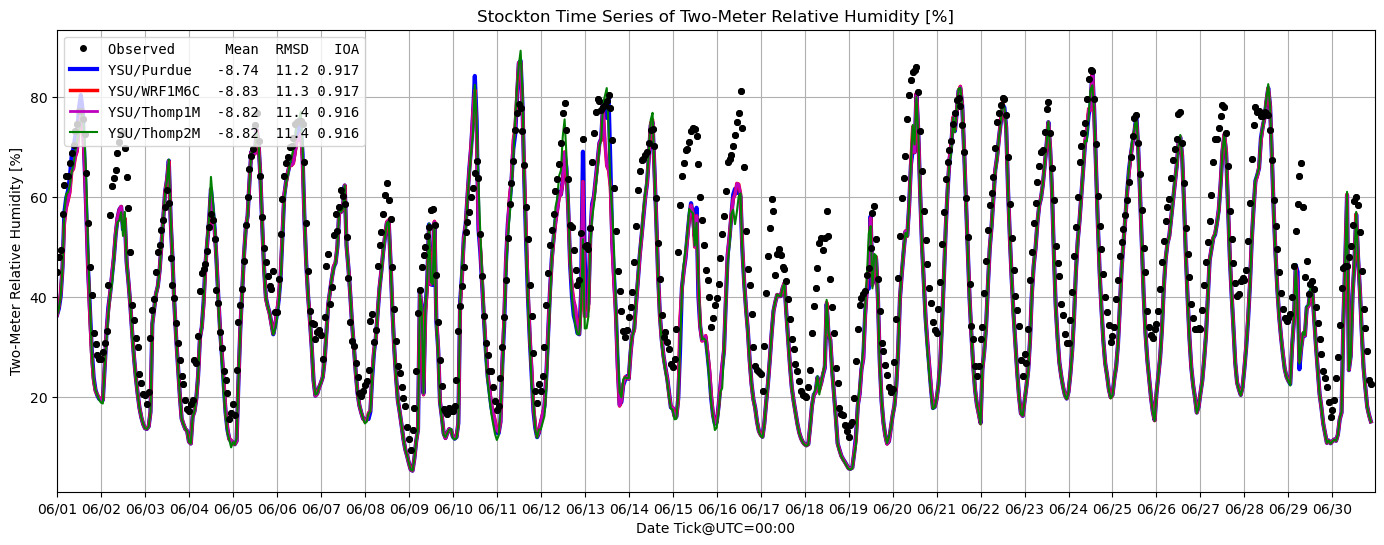

In [13]:
## Loading the Libaries.
from PyWRFFun import MonthGlob, CalcStats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager
import pandas as pd

# === Get monthly WRF Values ===
Var = "rh2"
lat_point = 38.56844
lon_point = -121.49311
WRFFiles = ["/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP2_RAD4_250716/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP6_RAD4_250718/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP8_RAD4_250714/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP38_RAD4_250719/wrfout_d01_2020-06-*"
           ]
ModelDF  = MonthGlob(WRFFiles, Var, lat_point, lon_point)
ModelNames=["YSU/Purdue","YSU/WRF1M6C","YSU/Thomp1M","YSU/Thomp2M"]
NModels=len(WRFFiles)

# ====== Get the EPA Data ======
DataDF = pd.read_csv(
    "/data/wto/EPAMetData/hourly_RH_2020_06_SacSoCap.csv",
    header=None, usecols=[11,12,13], names=["date", "time", "OBS"]
)

DataDF["datetime"] = pd.to_datetime(DataDF["date"] + " " + DataDF["time"])
DataDF = DataDF.set_index("datetime").sort_index()
FullDF = ModelDF.join(DataDF["OBS"], how="left")

# ====== Make the plot ======
Title = "Sacramento Capitol Time Series of Two-Meter Relative Humidity [%]"
YLabel = "Two-Meter Relative Humidity [%]"
labels = []
mean_bias, rmsd, ioa = CalcStats(FullDF)
for model_name, col in zip(ModelNames, mean_bias.index):
    labels.append(f"{model_name:<12}"  f"{mean_bias[col]:>6.3g}"
                  f"{rmsd[col]:>6.3g}" f"{ioa[col]:>6.3g}")
fig, ax = plt.subplots(figsize=(17,6))
ax.plot(FullDF.index, FullDF["OBS"], 'k.', markersize=8, label=f"{'Observed':<12}" f"{'Mean':>6}" f"{'RMSD':>6}" f"{'IOA':>6}")
ax.plot(FullDF.index, FullDF["Model1"], 'b-', linewidth=3, label=labels[0])
ax.plot(FullDF.index, FullDF["Model2"], 'r-', linewidth=2.5, label=labels[1])
ax.plot(FullDF.index, FullDF["Model2"], 'm-', linewidth=2, label=labels[2])
ax.plot(FullDF.index, FullDF["Model3"], 'g-', linewidth=1.5, label=labels[3])
ax.plot(FullDF.index, FullDF["OBS"], 'k.', markersize=8)
ax.set_xlim([DataDF.index.min(), DataDF.index.max()])
plt.xlabel("Date Tick@UTC=00:00")
plt.ylabel(YLabel)
plt.title(Title)
plt.grid(True)
plt.legend(prop=font_manager.FontProperties(family='monospace'))
# --- force daily ticks ---
ax.xaxis.set_major_locator(mdates.DayLocator())              # tick every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))  # format tick labels
plt.show()

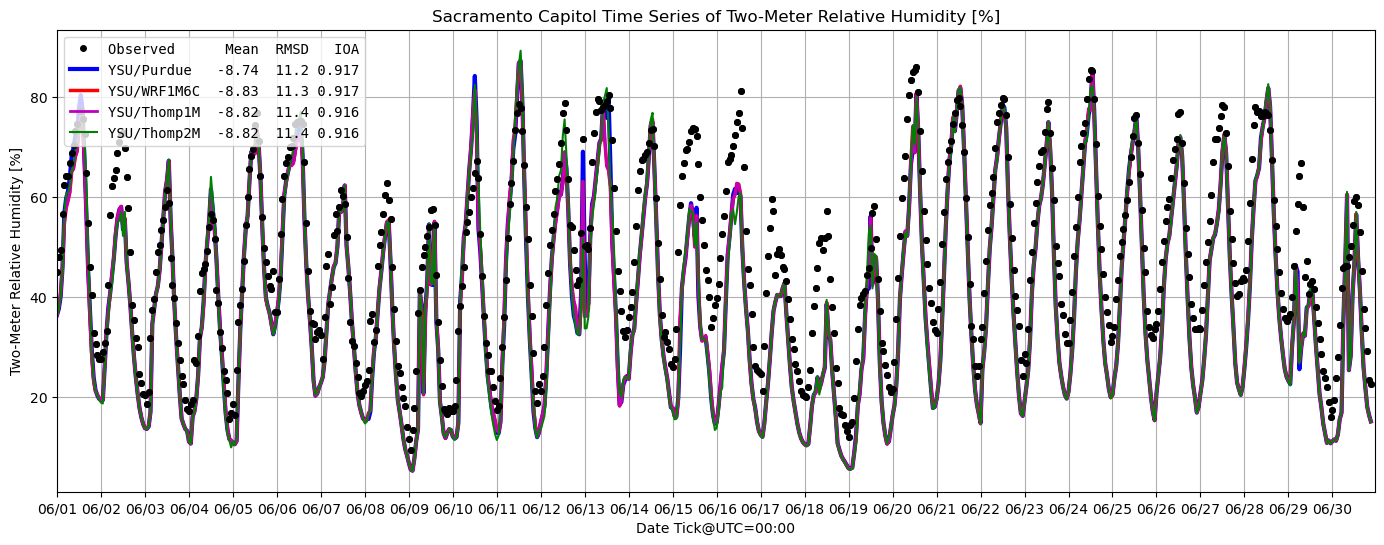

In [14]:
# ====== Make the plot ======
Title = "Sacramento Capitol Time Series of Two-Meter Relative Humidity [%]"
YLabel = "Two-Meter Relative Humidity [%]"
labels = []
mean_bias, rmsd, ioa = CalcStats(FullDF)
for model_name, col in zip(ModelNames, mean_bias.index):
    labels.append(f"{model_name:<12}"  f"{mean_bias[col]:>6.3g}"
                  f"{rmsd[col]:>6.3g}" f"{ioa[col]:>6.3g}")
fig, ax = plt.subplots(figsize=(17,6))
ax.plot(FullDF.index, FullDF["OBS"], 'k.', markersize=8, label=f"{'Observed':<12}" f"{'Mean':>6}" f"{'RMSD':>6}" f"{'IOA':>6}")
ax.plot(FullDF.index, FullDF["Model1"], 'b-', linewidth=3, label=labels[0])
ax.plot(FullDF.index, FullDF["Model2"], 'r-', linewidth=2.5, label=labels[1])
ax.plot(FullDF.index, FullDF["Model2"], 'm-', linewidth=2, label=labels[2])
ax.plot(FullDF.index, FullDF["Model3"], 'g-', linewidth=1.5, label=labels[3])
ax.plot(FullDF.index, FullDF["OBS"], 'k.', markersize=8)
ax.set_xlim([DataDF.index.min(), DataDF.index.max()])
plt.xlabel("Date Tick@UTC=00:00")
plt.ylabel(YLabel)
plt.title(Title)
plt.grid(True)
plt.legend(prop=font_manager.FontProperties(family='monospace'))
# --- force daily ticks ---
ax.xaxis.set_major_locator(mdates.DayLocator())              # tick every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))  # format tick labels
plt.show()

### T2 for Placerville

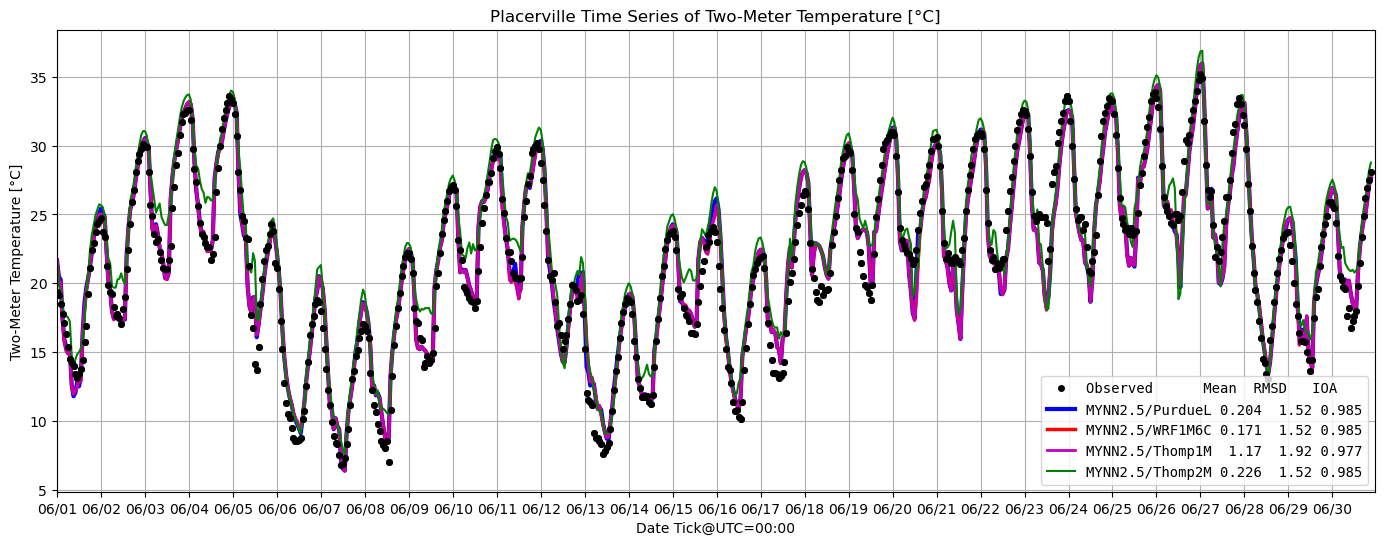

In [15]:
## Loading the Libaries.
from PyWRFFun import MonthGlob, CalcStats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager
import pandas as pd

# === Get monthly WRF Values ===
Var = "T2"
lat_point = 38.725282
lon_point = -120.821916
WRFFiles = ["/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_MP2_RAD4_250805/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_MP6_RAD4_251118/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_MP8_RAD4_250711/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_MP38_RAD4_250804/wrfout_d01_2020-06-*"
           ]
ModelDF  = MonthGlob(WRFFiles, Var, lat_point, lon_point, offset=-273.15)
ModelNames=["MYNN2.5/PurdueL","MYNN2.5/WRF1M6C","MYNN2.5/Thomp1M","MYNN2.5/Thomp2M"]
NModels=len(WRFFiles)

# ====== Get the EPA Data ======
DataDF = pd.read_csv(
    "/data/wto/EPAMetData/hourly_TEMP_2020_06_Placerville.csv",
    header=None, usecols=[11,12,13], names=["date", "time", "OBS"]
)

DataDF["datetime"] = pd.to_datetime(DataDF["date"] + " " + DataDF["time"])
DataDF = DataDF.set_index("datetime").sort_index()
DataDF["OBS"] = (DataDF["OBS"] - 32) * 5/9
FullDF = ModelDF.join(DataDF["OBS"], how="left")

# ====== Make the plot ======
Title = "Placerville Time Series of Two-Meter Temperature [°C]"
YLabel = "Two-Meter Temperature [°C]"
labels = []
mean_bias, rmsd, ioa = CalcStats(FullDF)
for model_name, col in zip(ModelNames, mean_bias.index):
    labels.append(f"{model_name:<12}"  f"{mean_bias[col]:>6.3g}"
                  f"{rmsd[col]:>6.3g}" f"{ioa[col]:>6.3g}")
fig, ax = plt.subplots(figsize=(17,6))
ax.plot(FullDF.index, FullDF["OBS"], 'k.', markersize=8, label=f"{'Observed':<12}" f"{'Mean':>6}" f"{'RMSD':>6}" f"{'IOA':>6}")
ax.plot(FullDF.index, FullDF["Model1"], 'b-', linewidth=3, label=labels[0])
ax.plot(FullDF.index, FullDF["Model2"], 'r-', linewidth=2.5, label=labels[1])
ax.plot(FullDF.index, FullDF["Model2"], 'm-', linewidth=2, label=labels[2])
ax.plot(FullDF.index, FullDF["Model3"], 'g-', linewidth=1.5, label=labels[3])
ax.plot(FullDF.index, FullDF["OBS"], 'k.', markersize=8)
ax.set_xlim([DataDF.index.min(), DataDF.index.max()])
plt.xlabel("Date Tick@UTC=00:00")
plt.ylabel(YLabel)
plt.title(Title)
plt.grid(True)
plt.legend(prop=font_manager.FontProperties(family='monospace'))
# --- force daily ticks ---
ax.xaxis.set_major_locator(mdates.DayLocator())              # tick every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))  # format tick labels
plt.show()

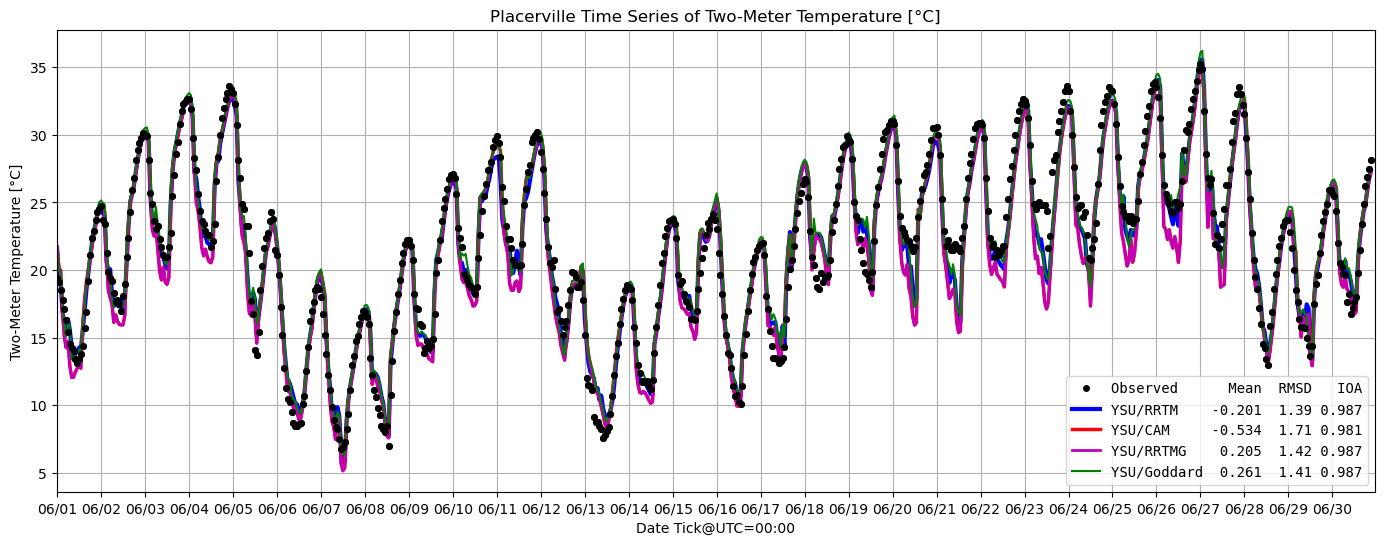

In [16]:
## Loading the Libaries.
from PyWRFFun import MonthGlob, CalcStats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager
import pandas as pd

# === Get monthly WRF Values ===
Var = "T2"
lat_point = 38.725282
lon_point = -120.821916
WRFFiles = ["/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP6_RAD1_251126/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP6_RAD3_251127/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP6_RAD4_250718/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP6_RAD5_251128/wrfout_d01_2020-06-*"
           ]
ModelDF  = MonthGlob(WRFFiles, Var, lat_point, lon_point, offset=-273.15)
ModelNames=["YSU/RRTM", "YSU/CAM","YSU/RRTMG","YSU/Goddard"]
NModels=len(WRFFiles)

# ====== Get the EPA Data ======
DataDF = pd.read_csv(
    "/data/wto/EPAMetData/hourly_TEMP_2020_06_Placerville.csv",
    header=None, usecols=[11,12,13], names=["date", "time", "OBS"]
)

DataDF["datetime"] = pd.to_datetime(DataDF["date"] + " " + DataDF["time"])
DataDF = DataDF.set_index("datetime").sort_index()
DataDF["OBS"] = (DataDF["OBS"] - 32) * 5/9
FullDF = ModelDF.join(DataDF["OBS"], how="left")

# ====== Make the plot ======
Title = "Placerville Time Series of Two-Meter Temperature [°C]"
YLabel = "Two-Meter Temperature [°C]"
labels = []
mean_bias, rmsd, ioa = CalcStats(FullDF)
for model_name, col in zip(ModelNames, mean_bias.index):
    labels.append(f"{model_name:<12}"  f"{mean_bias[col]:>6.3g}"
                  f"{rmsd[col]:>6.3g}" f"{ioa[col]:>6.3g}")
fig, ax = plt.subplots(figsize=(17,6))
ax.plot(FullDF.index, FullDF["OBS"], 'k.', markersize=8, label=f"{'Observed':<12}" f"{'Mean':>6}" f"{'RMSD':>6}" f"{'IOA':>6}")
ax.plot(FullDF.index, FullDF["Model1"], 'b-', linewidth=3, label=labels[0])
ax.plot(FullDF.index, FullDF["Model2"], 'r-', linewidth=2.5, label=labels[1])
ax.plot(FullDF.index, FullDF["Model2"], 'm-', linewidth=2, label=labels[2])
ax.plot(FullDF.index, FullDF["Model3"], 'g-', linewidth=1.5, label=labels[3])
ax.plot(FullDF.index, FullDF["OBS"], 'k.', markersize=8)
ax.set_xlim([DataDF.index.min(), DataDF.index.max()])
plt.xlabel("Date Tick@UTC=00:00")
plt.ylabel(YLabel)
plt.title(Title)
plt.grid(True)
plt.legend(prop=font_manager.FontProperties(family='monospace'))
# --- force daily ticks ---
ax.xaxis.set_major_locator(mdates.DayLocator())              # tick every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))  # format tick labels
plt.show()

## Dixon

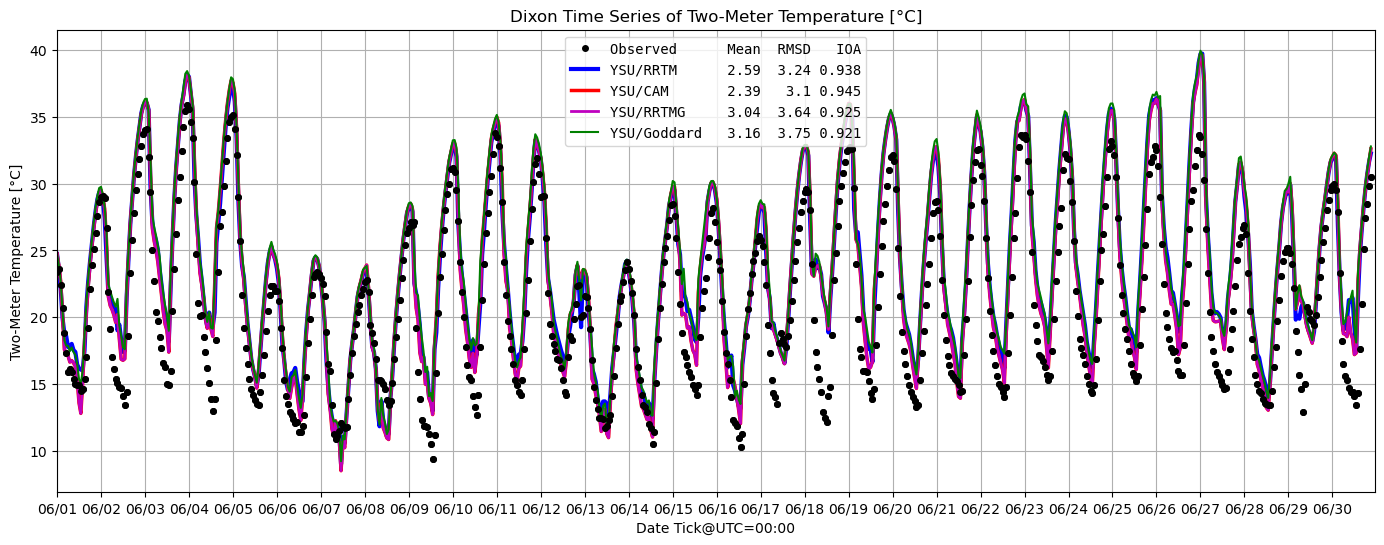

In [17]:
## Loading the Libaries.
from PyWRFFun import MonthGlob, CalcStats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager
import pandas as pd

# === Get monthly WRF Values ===
Var = "T2"
lat_point = 38.443056
lon_point = -121.858611
WRFFiles = ["/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP6_RAD1_251126/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP6_RAD3_251127/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP6_RAD4_250718/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP6_RAD5_251128/wrfout_d01_2020-06-*"
           ]
ModelDF  = MonthGlob(WRFFiles, Var, lat_point, lon_point, offset=-273.15)
ModelNames=["YSU/RRTM", "YSU/CAM","YSU/RRTMG","YSU/Goddard"]
NModels=len(WRFFiles)

# ====== Get the EPA Data ======
DataDF = pd.read_csv(
    "/data/wto/EPAMetData/hourly_TEMP_2020_06_Dixon.csv",
    header=None, usecols=[11,12,13], names=["date", "time", "OBS"]
)

DataDF["datetime"] = pd.to_datetime(DataDF["date"] + " " + DataDF["time"])
DataDF = DataDF.set_index("datetime").sort_index()
DataDF["OBS"] = (DataDF["OBS"] - 32) * 5/9
FullDF = ModelDF.join(DataDF["OBS"], how="left")

# ====== Make the plot ======
Title = "Dixon Time Series of Two-Meter Temperature [°C]"
YLabel = "Two-Meter Temperature [°C]"
labels = []
mean_bias, rmsd, ioa = CalcStats(FullDF)
for model_name, col in zip(ModelNames, mean_bias.index):
    labels.append(f"{model_name:<12}"  f"{mean_bias[col]:>6.3g}"
                  f"{rmsd[col]:>6.3g}" f"{ioa[col]:>6.3g}")
fig, ax = plt.subplots(figsize=(17,6))
ax.plot(FullDF.index, FullDF["OBS"], 'k.', markersize=8, label=f"{'Observed':<12}" f"{'Mean':>6}" f"{'RMSD':>6}" f"{'IOA':>6}")
ax.plot(FullDF.index, FullDF["Model1"], 'b-', linewidth=3, label=labels[0])
ax.plot(FullDF.index, FullDF["Model2"], 'r-', linewidth=2.5, label=labels[1])
ax.plot(FullDF.index, FullDF["Model2"], 'm-', linewidth=2, label=labels[2])
ax.plot(FullDF.index, FullDF["Model3"], 'g-', linewidth=1.5, label=labels[3])
ax.plot(FullDF.index, FullDF["OBS"], 'k.', markersize=8)
ax.set_xlim([DataDF.index.min(), DataDF.index.max()])
plt.xlabel("Date Tick@UTC=00:00")
plt.ylabel(YLabel)
plt.title(Title)
plt.grid(True)
plt.legend(prop=font_manager.FontProperties(family='monospace'))
# --- force daily ticks ---
ax.xaxis.set_major_locator(mdates.DayLocator())              # tick every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))  # format tick labels
plt.show()

## Jackson

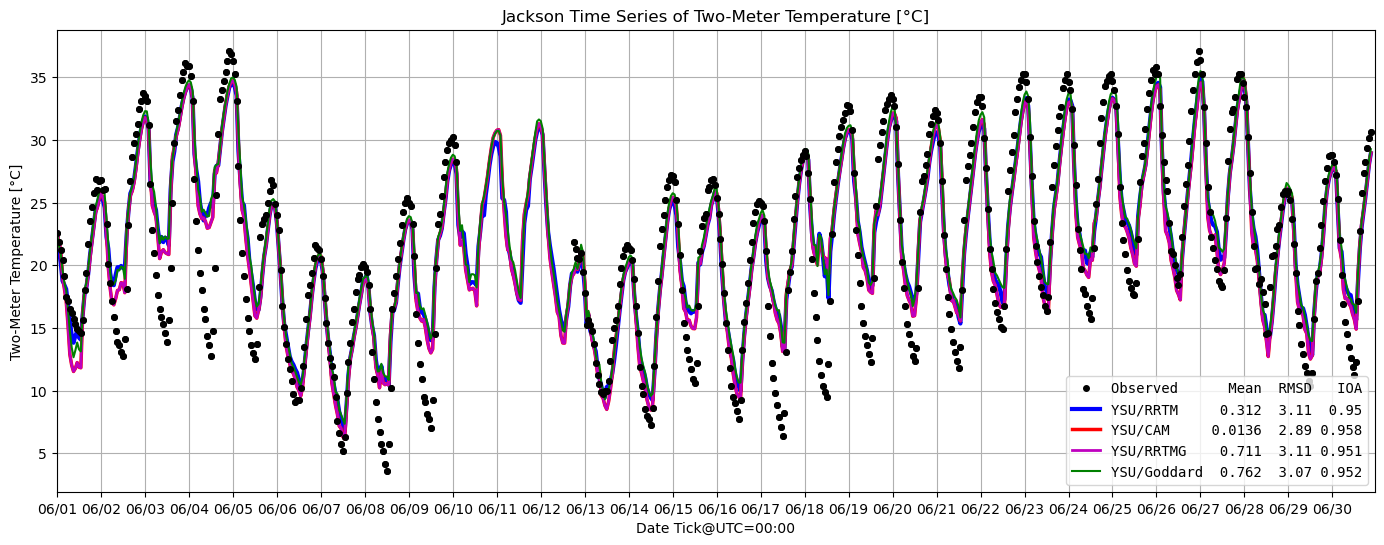

In [18]:
## Loading the Libaries.
from PyWRFFun import MonthGlob, CalcStats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager
import pandas as pd

# === Get monthly WRF Values ===
Var = "T2"
lat_point = 38.342606
lon_point = -120.764426
WRFFiles = ["/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP6_RAD1_251126/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP6_RAD3_251127/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP6_RAD4_250718/wrfout_d01_2020-06-*",
           "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_MP6_RAD5_251128/wrfout_d01_2020-06-*"
           ]
ModelDF  = MonthGlob(WRFFiles, Var, lat_point, lon_point, offset=-273.15)
ModelNames=["YSU/RRTM", "YSU/CAM","YSU/RRTMG","YSU/Goddard"]
NModels=len(WRFFiles)

# ====== Get the EPA Data ======
DataDF = pd.read_csv(
    "/data/wto/EPAMetData/hourly_TEMP_2020_06_Jackson.csv",
    header=None, usecols=[11,12,13], names=["date", "time", "OBS"]
)

DataDF["datetime"] = pd.to_datetime(DataDF["date"] + " " + DataDF["time"])
DataDF = DataDF.set_index("datetime").sort_index()
DataDF["OBS"] = (DataDF["OBS"] - 32) * 5/9
FullDF = ModelDF.join(DataDF["OBS"], how="left")

# ====== Make the plot ======
Title = "Jackson Time Series of Two-Meter Temperature [°C]"
YLabel = "Two-Meter Temperature [°C]"
labels = []
mean_bias, rmsd, ioa = CalcStats(FullDF)
for model_name, col in zip(ModelNames, mean_bias.index):
    labels.append(f"{model_name:<12}"  f"{mean_bias[col]:>6.3g}"
                  f"{rmsd[col]:>6.3g}" f"{ioa[col]:>6.3g}")
fig, ax = plt.subplots(figsize=(17,6))
ax.plot(FullDF.index, FullDF["OBS"], 'k.', markersize=8, label=f"{'Observed':<12}" f"{'Mean':>6}" f"{'RMSD':>6}" f"{'IOA':>6}")
ax.plot(FullDF.index, FullDF["Model1"], 'b-', linewidth=3, label=labels[0])
ax.plot(FullDF.index, FullDF["Model2"], 'r-', linewidth=2.5, label=labels[1])
ax.plot(FullDF.index, FullDF["Model2"], 'm-', linewidth=2, label=labels[2])
ax.plot(FullDF.index, FullDF["Model3"], 'g-', linewidth=1.5, label=labels[3])
ax.plot(FullDF.index, FullDF["OBS"], 'k.', markersize=8)
ax.set_xlim([DataDF.index.min(), DataDF.index.max()])
plt.xlabel("Date Tick@UTC=00:00")
plt.ylabel(YLabel)
plt.title(Title)
plt.grid(True)
plt.legend(prop=font_manager.FontProperties(family='monospace'))
# --- force daily ticks ---
ax.xaxis.set_major_locator(mdates.DayLocator())              # tick every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))  # format tick labels
plt.show()